In [4]:
!pip install transformers
!pip install pandas
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [5]:
from datasets import load_dataset

dataset = load_dataset("hugginglearners/netflix-shows", split="train")
df = pd.DataFrame(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,None,None,None,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [11]:
tfidf_features = tfidf_vectorizer.fit_transform(df["description"])

In [12]:
from sklearn.cluster import KMeans

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [13]:
df["cluster_label"] = kmeans.labels_

In [15]:
terms = tfidf_vectorizer.get_feature_names_out()

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print(f"Cluster {i} top terms:")
    for ind in order_centroids[i, :10]:
        print(terms[ind])
    print()

Cluster 0 top terms:
his
to
and
the
in
with
an
of
for
man

Cluster 1 top terms:
and
to
the
in
an
of
with
for
they
on

Cluster 2 top terms:
their
and
to
the
of
in
two
when
they
with

Cluster 3 top terms:
she
her
to
when
the
and
with
in
an
for

Cluster 4 top terms:
the
of
and
to
in
world
from
on
with
his

Cluster 5 top terms:
stand
up
special
and
comedian
in
more
his
comedy
on

Cluster 6 top terms:
her
to
and
with
the
woman
in
for
of
after

Cluster 7 top terms:
he
his
to
the
when
in
is
of
and
an

Cluster 8 top terms:
this
in
the
of
and
series
on
to
from
drama

Cluster 9 top terms:
documentary
this
the
of
and
in
follows
to
explores
series



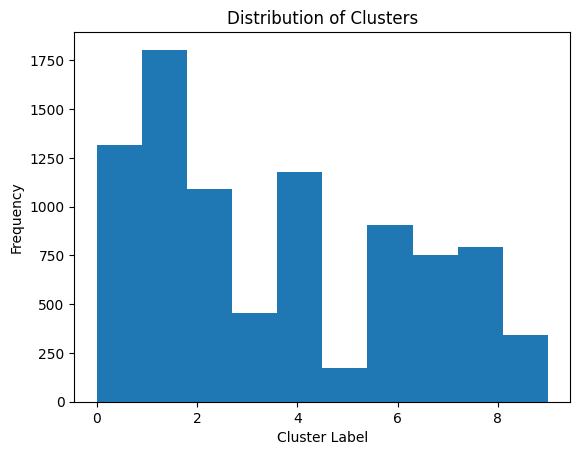

In [17]:
import matplotlib.pyplot as plt

plt.hist(df["cluster_label"], bins=num_clusters)
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.title("Distribution of Clusters")
plt.show()

In [18]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [19]:
actual_genre = df["listed_in"]

In [20]:
ari = adjusted_rand_score(actual_genre, df["cluster_label"])
nmi = normalized_mutual_info_score(actual_genre, df["cluster_label"])

In [21]:
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

Adjusted Rand Index (ARI): 0.009838072713826475
Normalized Mutual Information (NMI): 0.12163111514711995


In [22]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=801c963114c0e98abc5058964e4a44da571af03c1eb3849be9ad6bc81a74e506
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [26]:
import numpy as np
import skfuzzy as fuzz

num_clusters = 10

tfidf_array = tfidf_features.toarray()

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    tfidf_array.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)

cluster_labels = np.argmax(u, axis=0)

df["cluster_overlap_label"] = cluster_labels

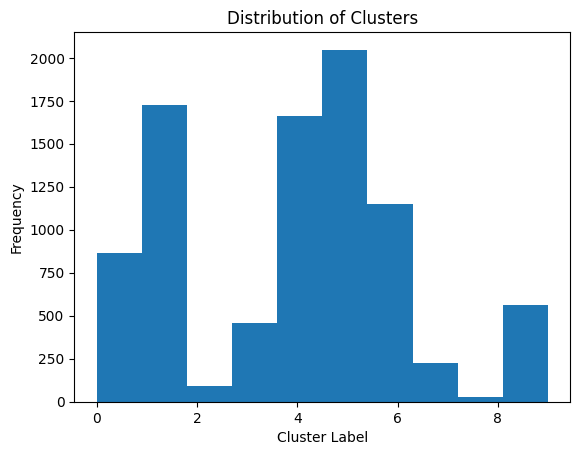

In [27]:
import matplotlib.pyplot as plt

plt.hist(df["cluster_overlap_label"], bins=num_clusters)
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.title("Distribution of Clusters")
plt.show()

In [28]:
ari2 = adjusted_rand_score(actual_genre, df["cluster_overlap_label"])
nmi2 = normalized_mutual_info_score(actual_genre, df["cluster_overlap_label"])

In [29]:
print(f"Adjusted Rand Index (ARI): {ari2}")
print(f"Normalized Mutual Information (NMI): {nmi2}")

Adjusted Rand Index (ARI): 0.010138371195358218
Normalized Mutual Information (NMI): 0.10190073278086263


In [31]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["description"], df["listed_in"], test_size=0.2, random_state=42
)

# Extract features from the descriptions
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
train_features = tfidf_vectorizer.fit_transform(train_texts)
test_features = tfidf_vectorizer.transform(test_texts)

# Train a machine learning model to predict genres
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define and train the model
model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=1000)),
    ("clf", LogisticRegression(max_iter=1000))
])

model.fit(train_texts, train_labels)

# Evaluate the model
from sklearn.metrics import classification_report

predictions = model.predict(test_texts)
print(classification_report(test_labels, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                 precision    recall  f1-score   support

                                                             Action & Adventure       0.22      0.37      0.28        27
                   Action & Adventure, Anime Features, Children & Family Movies       0.00      0.00      0.00         1
                             Action & Adventure, Anime Features, Classic Movies       0.00      0.00      0.00         1
                       Action & Adventure, Anime Features, International Movies       0.00      0.00      0.00         8
                           Action & Adventure, Anime Features, Sci-Fi & Fantasy       0.00      0.00      0.00         1
                   Action & Adventure, Children & Family Movies, Classic Movies       0.00      0.00      0.00         1
                         Action & Adventure, Children & Family Movies, Comedies       0.00      0.00      0.00         1
                 Action & Adven

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.14642451759364358
